# Tussenproduct 2 : statistische analyses op de receptendata
## De Haagse Hogeschool
## Toegepaste Wiskunde


Groep 3  
Fenne van Agthoven, Phealana Fiamingo, Araksan Hassan, Kika van Vliet  
Datum: 3 mei 2024

## Klasse structuur die de recept data bevat en de bovengenoemde functies
    - Een method die de tabel met de ingrediënten inlaadt en die als property bewaard. Je moet zowel de originele als de schoongemaakte data in kunnen laden.
    - Een property die aangeeft of de ingeladen data schoongemaakt is.
    - Een method die recepten aanbeveelt op basis van een lijstje favoriete recepten. Voeg hiervoor alle ingrediënten in het lijstje met favoriete recepten samen in een vector, en bereken de cosinusgelijkenis tussen deze vector en de ingrediëntenvectoren van elk ander recept. Raadt de recepten aan waarvan de ingrediënten de grootste overeenkomst hebben met de ingrediënten van de favoriete recepten. Deze functie gebruiken we later om het weekmenu samen te stellen.


In [ ]:
import pandas as pd 
import numpy as np
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
ingr_ns=pd.read_csv('tabellen/data_ingr.csv')
ingr_schoon=pd.read_csv('tabellen/data_ingr_clean.csv') 
recipes = pd.read_csv('tabellen/Recepten_kiezen_gescheiden.csv') # Onze lijst van recepten die we wel en niet lekker vinden
recipes_wel = recipes[:80] # DataFrame met alle recpeten die wij lekker vinden
recipes_niet = recipes[80:] # DataFrame met alle recepten die wij niet lekker vinden

In [ ]:
class Recepten: 
    
    def __init__(self, data_ingr, schoongemaakt=False): 
        # Initialisatie van de klasse met het pad naar de data en of de data schoon is 
        self.data_ingr = data_ingr
        self.schoongemaakt = schoongemaakt
        
    def laad_ingr(self):
        # Methode die de ingrediëntentabel inlaadt
        self.tabel = pd.read_csv(self.data_ingr)
        
    def aanbeveling(self, fav_recepten):
        # Alle favoriete ingredienten worden gezocht, dmv set worden de duplicates weggehaald
        self.fav_ingr = list(set(self.tabel['ingredient'].loc[self.tabel['recipe'].isin(fav_recepten)]))
        # Initialisatie van de CountVectorizer die text data convergeert naar getallen
        count_vectorizer = CountVectorizer()
        # Convergeert fav_ingr naar een matrix van tokens
        self.fav_matrix = count_vectorizer.fit_transform(self.fav_ingr)
        # Initialiseer een lege lijst om alle recepten op te slaan
        titel_lijst = []
        # Itereer door alle recepten, maar filter de favoriete eruit en voorkom ook dubbele receptnamen
        [titel_lijst.append(recept) for recept in self.tabel['recipe'] if recept not in fav_recepten and recept not in titel_lijst]
        # Initialiseer een lege lijst om de gelijkenisscore in te bewaren tussen de fav recepten en alle andere
        gelijkenis = []
        # Bereken de cosinusgelijkenis tussen de fav recepten en alle ander
        for recept in titel_lijst:
            # Kies de ingredientelijst van het huidige recept
            recept_lijst = list(self.tabel['ingredient'].loc[self.tabel['recipe']==recept])
            # Convergeer de ingredientenlijst naar een matrix van token obv de fav_matrix
            rec_matrix = count_vectorizer.transform(recept_lijst)
            # Bereken de cosinusgelijkenis tussen het huidige recept en de favoriete ingredienten, 
            # dmv van een vector bestaand uit enen, evengroot als het aantal ingredienten in het huidige recept
            cosinus = cosine_similarity(np.ones(np.size(rec_matrix.toarray())).reshape(1,-1), rec_matrix.reshape(1,-1))
            # Voeg de gelijkenis score en het recept toe aan de lijst
            gelijkenis.append([cosinus[0][0],recept])
        
        # Sorteer de lijst aan gelijkenissen op aflopende volgorde
        gelijkenis.sort(reverse=True)
        # Selecteer de top 10 aanbevolen recepten op basis van de cosinusgelijkenis
        self.aanbeveling = [titel[1] for titel in gelijkenis][:10]
        
        return self.aanbeveling
        
recepten_klasse = Recepten('tabellen/data_ingr_clean.csv',schoongemaakt=True)
recepten_klasse.laad_ingr()

## Evaluatie van het aanbevelingsalgoritme met de Precision@10 metriek.
We hebben de aanbevelingsfunctie gebruikt om per groepslid 10 recepten aan te raden op basis van onze favoriete recepten.
Om te evalueren of de aanbevelingsfunctie goed werkt hebben we de Precision@10 metriek berekend.
We hebben dit eerst gedaan met de schoongemaakte dataset en vervolgens ook met de orginele dataset.

### De Precision@10 metriek met de schoongemaakte dataset

**Kika**  
Uit de 10 aanbevolen recepten voor Kika, zou zij zelf 8 recepten maken.  
De Precision@10 is dan: 8/10 = 0.8

In [ ]:
recepten_kika = recipes_wel[:20]
recepten_klasse_k = Recepten('tabellen/data_ingr_clean.csv',schoongemaakt=True)
recepten_klasse_k.laad_ingr()
fav_recepten_k = recepten_kika['title'].tolist()
aanbevolen_k = recepten_klasse_k.aanbeveling(fav_recepten_k)
print('De volgende 10 recepten worden aanbevolen voor Kika: ', aanbevolen_k)

**Araksan**  
Uit de 10 aanbevolen recepten voor Araksan, zou zij zelf 8 recepten maken.  
De Precision@10 is dan: 8/10 = 0.8

In [ ]:
recepten_araksan = recipes_wel[20:40]
recepten_klasse_a = Recepten('tabellen/data_ingr_clean.csv',schoongemaakt=True)
recepten_klasse_a.laad_ingr()
fav_recepten_a = recepten_araksan['title'].tolist()
aanbevolen_a = recepten_klasse_a.aanbeveling(fav_recepten_a)
print('De volgende 10 recepten worden aanbevolen voor Araksan: ', aanbevolen_a)

**Fenne**  
Uit de 10 aanbevolen recepten voor Fenne, zou zij zelf 7 recepten maken.  
De Precision@10 is dan: 7/10 = 0.7

In [ ]:
recepten_fenne = recipes_wel[40:60]
recepten_klasse_f = Recepten('tabellen/data_ingr_clean.csv',schoongemaakt=True)
recepten_klasse_f.laad_ingr()
fav_recepten_f = recepten_fenne['title'].tolist()
aanbevolen_f = recepten_klasse_f.aanbeveling(fav_recepten_f)
print('De volgende 10 recepten worden aanbevolen voor Fenne: ', aanbevolen_f)

**Phealana**  
Uit de 10 aanbevolen recepten voor Phealana, zou zij zelf 8 recepten maken.  
De Precision@10 is dan: 8/10 = 0.8

In [ ]:
recepten_phea = recipes_wel[60:80]
recepten_klasse_p = Recepten('tabellen/data_ingr_clean.csv',schoongemaakt=True)
recepten_klasse_p.laad_ingr()
fav_recepten_p = recepten_phea['title'].tolist()
aanbevolen_p = recepten_klasse_p.aanbeveling(fav_recepten_p)
print('De volgende 10 recepten worden aanbevolen voor Phea: ', aanbevolen_p)

**Uitkomst:**  
De gemiddelde Precision@10 voor de schoongemaakte dataset is ongeveer 0.8.
Wij zijn tevreden met deze uitkomst, hiermee kunnen we stellen dat onze aanbevelingsfunctie goed werkt.

### De Precision@10 metriek met de orginele dataset

**Kika**  
Uit de 10 aanbevolen recepten voor Kika, zou zij zelf 7 recepten maken.  
De Precision@10 is dan: 7/10 = 0.7

In [ ]:
recepten_klasse_k = Recepten('tabellen/data_ingr.csv',schoongemaakt=False)
recepten_klasse_k.laad_ingr()
fav_recepten_k = recepten_kika['title'].tolist()
aanbevolen_k = recepten_klasse_k.aanbeveling(fav_recepten_k)
print('De volgende 10 recepten worden aanbevolen voor Kika: ', aanbevolen_k)
# precision@10: 7/10= 70%

**Araksan**  
Uit de 10 aanbevolen recepten voor Araksan, zou zij zelf 6 recepten maken.  
De Precision@10 is dan: 6/10 = 0.6

In [ ]:
recepten_klasse_a = Recepten('tabellen/data_ingr.csv',schoongemaakt=False)
recepten_klasse_a.laad_ingr()
fav_recepten_a = recepten_araksan['title'].tolist()
aanbevolen_a = recepten_klasse_a.aanbeveling(fav_recepten_a)
print('De volgende 10 recepten worden aanbevolen voor Araksan: ', aanbevolen_a)
# precision@10: 6/10= 60%

**Fenne**  
Uit de 10 aanbevolen recepten voor Fenne, zou zij zelf 7 recepten maken.  
De Precision@10 is dan: 7/10 = 0.7

In [ ]:
recepten_klasse_f = Recepten('tabellen/data_ingr.csv',schoongemaakt=False)
recepten_klasse_f.laad_ingr()
fav_recepten_f = recepten_fenne['title'].tolist()
aanbevolen_f = recepten_klasse_f.aanbeveling(fav_recepten_f)
print('De volgende 10 recepten worden aanbevolen voor Fenne: ', aanbevolen_f)
# precision@10: 7/10= 70%

**Phealana**  
Uit de 10 aanbevolen recepten voor Phealana, zou zij zelf 6 recepten maken.  
De Precision@10 is dan: 6/10 = 0.6

In [ ]:
recepten_klasse_p = Recepten('tabellen/data_ingr.csv',schoongemaakt=False)
recepten_klasse_p.laad_ingr()
fav_recepten_p = recepten_phea['title'].tolist()
aanbevolen_p = recepten_klasse_p.aanbeveling(fav_recepten_p)
print('De volgende 10 recepten worden aanbevolen voor Phea: ', aanbevolen_p)
# precision@10: 6/10= 60%

**Uitkomst:**  
De gemiddelde Precision@10 voor de orginele dataset is 0.65.
Deze uitkomst is lager dan bij de schoongemaakte dataset.
We kunnen stellen dat het nuttig was om de dataset op te schonen, omdat de aanbevelingsfunctie dan beter werkt volgens de Precision@10 metriek.


## Dataverkenning   

**nog even vertellen waarom we alles hebben gedaan**

in deelopdracht 1 zijn de data schoongemaakt. Evengoed kunnen er nog fouten in de data zitten: een ingrediënt dat in grammen moet staan staat in kilogrammen bijvoorbeeld. Voordat je verder kunt met de analyse zul je vertrouwen in de data moeten hebben. Zeker in de variabelen die je verder gaat gebruiken (denk aan de extra eis). Bedenk dat de recepten niet allemaal voor evenveel personen zijn en dat de nutriënten wel per persoon zijn.

    Overtuig je ervan dat er geen fouten meer in de data zitten. Dit kan o.a. door gebruik te maken van visualisaties.
    Beschrijf of je fouten (of uitbijters) hebt gevonden en geef aan hoe je dat hebt opgelost (gecorrigeerd of buiten beschouwing gelaten of iets anders)


**Stap 1:** We hebben eerst een boxplot gemaakt van alle hoeveelheden om te kijken of er veel uitbijters zijn. 

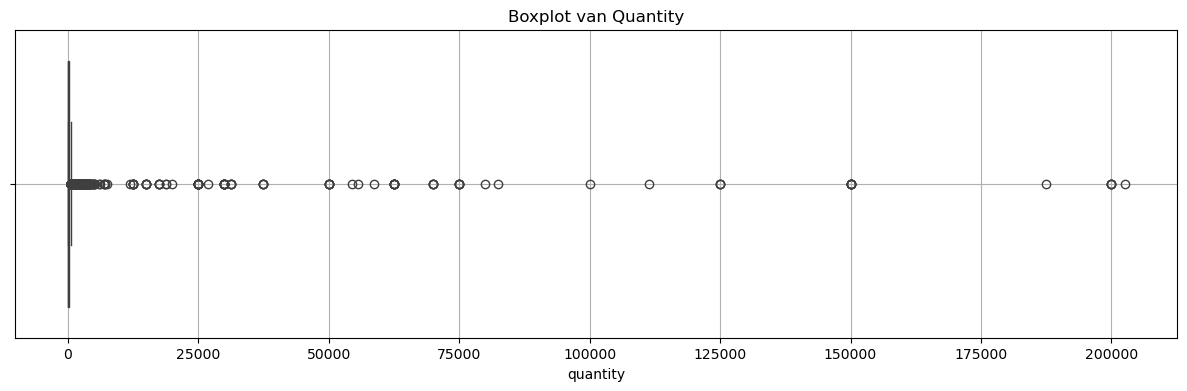

In [2]:
import pandas as pd  #inladen bibliotheken
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind

ingr_schoon=pd.read_csv('tabellen/data_ingr_clean.csv')  
recepten=pd.read_csv('tabellen/data_recipes.csv') 
plt.figure(figsize=(15,4))
sns.boxplot(x=ingr_schoon['quantity'])
plt.title('Boxplot van Quantity')
plt.xlabel('quantity')
plt.grid()
plt.show()

**Stap 2:** Vervolgens hebben we alle ingredienten geselecteerd waarbij de hoeveelheid groter is dan 5 kilo en gevisualiseerd door middel van een scatterplot.

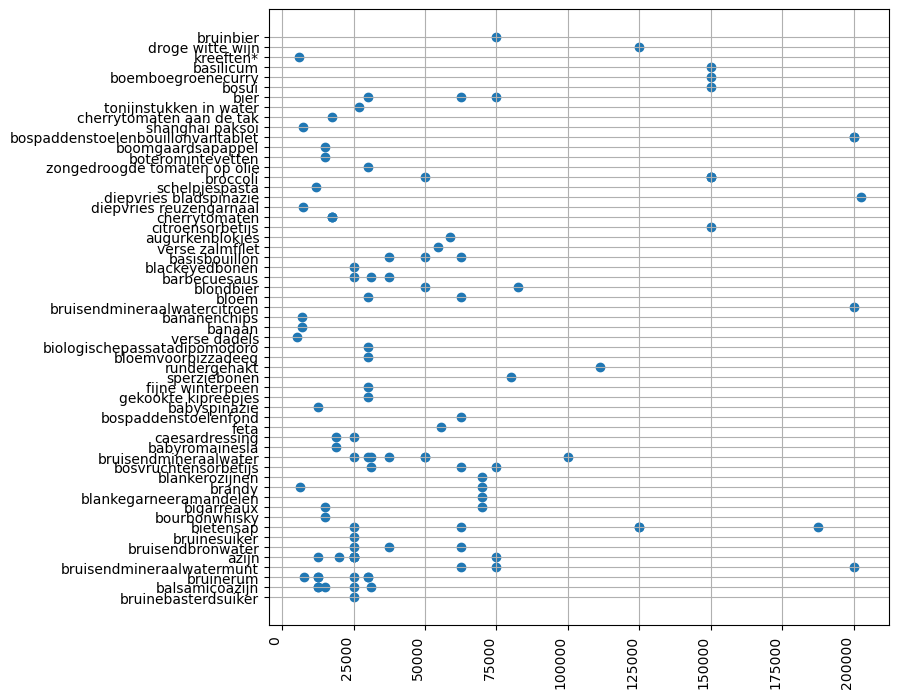

In [3]:
gr_dan =  ingr_schoon.copy()[(ingr_schoon["quantity"] > 5000)]
plt.figure(figsize=(8,8))
plt.scatter(gr_dan['quantity'], gr_dan['ingredient'])
plt.xticks(rotation = 90, ha='right')
plt.grid()
plt.show()

**Stap 3:** We vervangen alle ingrediënten die groter dan 5 kilo zijn door de mediaan van het ingrediënt en we visualiseren weer dmv scatterplot

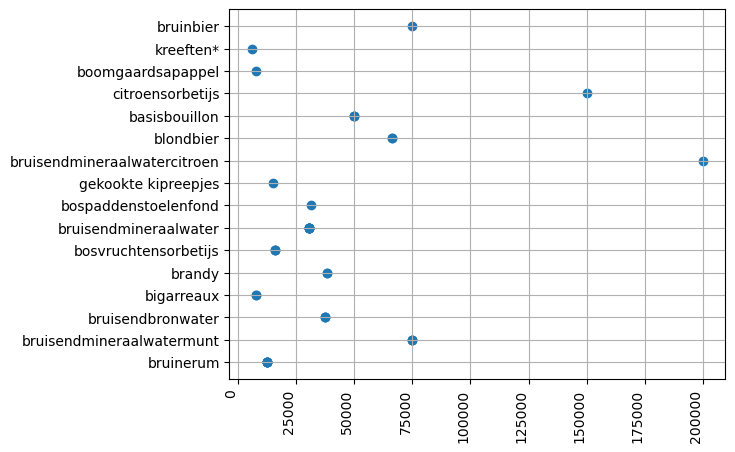

In [5]:
for i in gr_dan['ingredient']:   
    median_i = ingr_schoon['quantity'].loc[ingr_schoon['ingredient']== i].median() #De hoeveelheden van ingredienten > 10k overzetten naar mediaan van ingredient
    gr_dan['quantity'].mask(gr_dan['ingredient'] == i, median_i, inplace=True)
       
gr_dan_plot = gr_dan[(gr_dan["quantity"] > 5000)]
plt.scatter(gr_dan_plot['quantity'], gr_dan_plot['ingredient'])
plt.xticks(rotation = 90, ha='right')
plt.grid()
plt.show()

**Stap 4:** Vervangen in dataset en boxplot weer

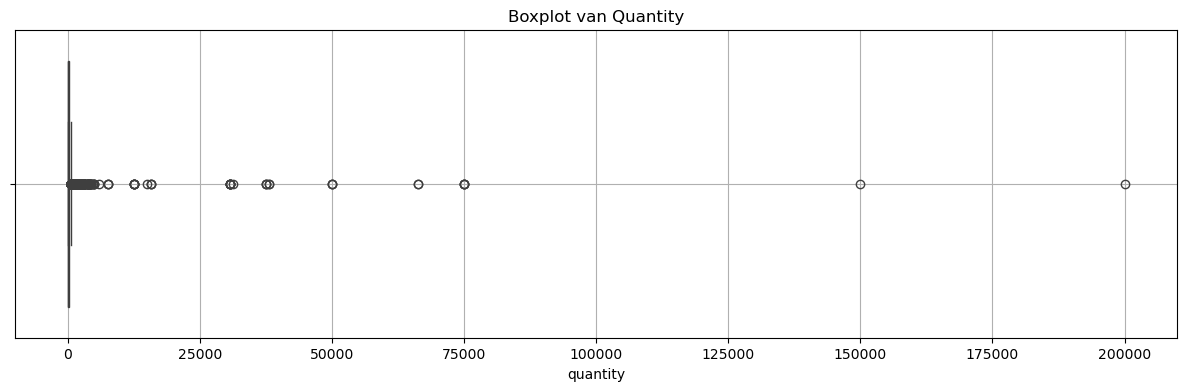

In [8]:
for i in gr_dan['ingredient']:
    quantity_i = gr_dan['quantity'].loc[gr_dan['ingredient']== i]
    ingr_schoon['quantity'].mask(ingr_schoon['ingredient'] == i, quantity_i, inplace=True)
    
plt.figure(figsize=(15,4))
sns.boxplot(x=ingr_schoon['quantity'])
plt.title('Boxplot van Quantity')
plt.xlabel('quantity')
plt.grid()
plt.show()

**Stap 5:** overige waarde omzetten naar 5 kilo en eindboxplot

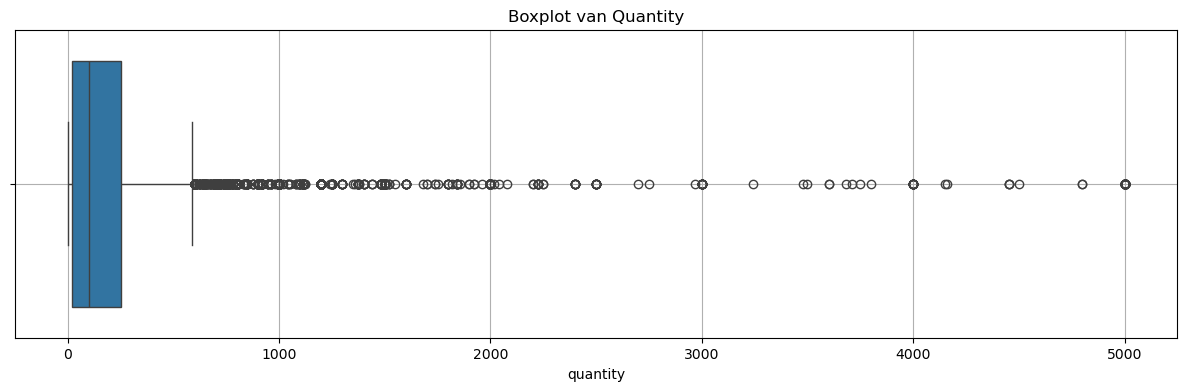

In [9]:
gr_dan3 = ingr_schoon.copy()[(ingr_schoon["quantity"] > 5000)]
for i in gr_dan3['ingredient']:
    ingr_schoon['quantity'].mask(ingr_schoon['ingredient'] == i, 5000, inplace=True) #Ingredienten > 10k vervangen door 10k

ingr_schoon
plt.figure(figsize=(15,4))
sns.boxplot(x=ingr_schoon['quantity'])
plt.title('Boxplot van Quantity')
plt.xlabel('quantity')
plt.grid()
plt.show()

### Hypothesetoets
formuleer een vermoeden en bijbehorende hypothesen waarin de extra eis verwerkt is en toets het vermoeden aan de hand van de dataset. Bijvoorbeeld: over bepaalde keukens bestaan vooroordelen. Zo zou de Franse keuken veel gerechten met knoflook bevatten. Als jullie extra eis met knoflook te maken heeft zou je dus kunnen toetsen of de Franse keuken inderdaad vaker knoflook bevat dan gemiddeld.

    Denk na over een bepaalde groep recepten (een keuken, of gebruik de tags) en formuleer hier een vermoeden over.
    Zorg er daarbij voor dat je dat vermoeden op basis van de gegevens over die recepten kunt toetsen. Denk daarbij vooral aan de nutriënten of ingrediënten (in relatie met jullie extra eis).
    Formuleer dit vermoeden in de vorm van een hypothese en toets deze hypothese.


**Ons vermoeden:**
De Amerikaanse keuken bevat meer calorieën dan de Hollandse keuken.

**Onze hypothese:**  
A = de gemiddelde hoeveelheid calorieën in de Amerikaanse keuken  
H = de gemiddelde hoeveelheid calorieën in de Hollandse keuken

H<sub>0</sub>: A <= H vs. H<sub>1</sub>: A > H 

**Gekozen significantieniveau** 
a= 0.05

In [10]:
tags = pd.read_csv('tabellen/data_tags.csv')
nutri = pd.read_csv('tabellen/data_nutritions.csv') 

amerikaans = tags[(tags['tag'] == 'amerikaans')]
hollands = tags[(tags['tag'] == 'hollands')]

#Tabel maken van ingredienten met de tags, de nutrition energie, en de waarde ervan
nutri_a = nutri[nutri['recipe'].isin(amerikaans['recipe'])]
nutri_h = nutri[nutri['recipe'].isin(hollands['recipe'])]

cal_a = nutri_a['value'].loc[nutri_a['nutrition']=='energie'].tolist()
cal_h = nutri_h['value'].loc[nutri_h['nutrition']=='energie'].tolist()  

h = nutri_h[(nutri_h['nutrition']=='energie')] 
a= nutri_a[(nutri_a['nutrition']=='energie')]  

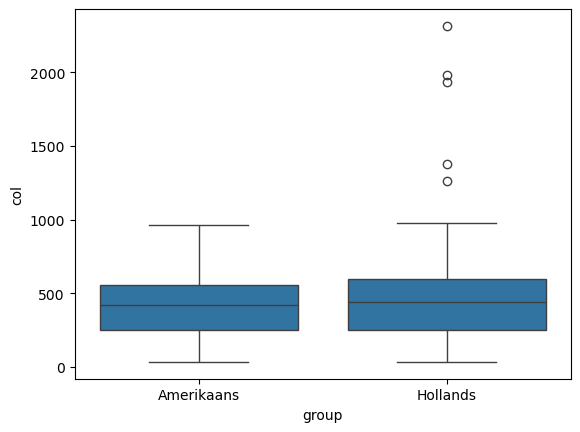

In [11]:
a= [int(i[0:-5]) for i in cal_a]  #Kcal verwijderen zodat het int wordt ipv string
h = [int(i[0:-5]) for i in cal_h]   

df_a = pd.DataFrame({'col':a}) 
df_h = pd.DataFrame({'col':h})  

df_a['group'] = 'Amerikaans'
df_h['group'] = 'Hollands'

combined_df = pd.concat([df_a, df_h])
sns.boxplot(x='group', y='col', data=combined_df)
plt.show()

In [12]:
ttest_ind(df_a['col'], df_h['col'], equal_var=True) #Ttest van calorien hollands vs amerikaans

TtestResult(statistic=-0.4427550161056866, pvalue=0.6580706089108573, df=750.0)

**Conclusie**
Uit de t-test volgt een p-waarde, die groter is dan het gekozen significantieniveau. Dit houdt in dat de nulhypothese behouden blijft, dus ons vermoeden niet klopt.

### Regressie-analyse
bij deelopdracht 1 hebben jullie gezamenlijk de data schoongemaakt. Daarbij zijn ingrediënten met (praktisch) dezelfde naam onder één naam gebracht en zijn alle ingrediënten omgezet naar grammen. Dat laatste is van belang omdat we nu een analyse willen gaan doen met die ingrediënten.

We willen onderzoeken welke ingrediënten in het recept het meeste bijdragen aan een nutriënt. Ingrediënt suiker zal bijvoorbeeld veel bijdragen aan de nutriënt koolhydraten, omdat dat een koolhydraat is.

    Kies één van de nutriënten. Daarbij is het weer handig om rekening te houden met jullie extra eis.
    Kies een groep gerechten waarin vaak dezelfde ingrediënten gebruikt worden. Zo zal in gebak vaak bloem en suiker gebruikt worden. Zorg dat je op die manier minstens 100 gerechten hebt geselecteerd en zorg dat daarin ten minste drie ingrediënten vaak voorkomen. Je kunt bij de selectie van je gerechten gebruik maken van de tags. Ook hier is het weer handig om je extra eis in gedachten te houden: kijk vooral naar ingrediënten en/of soorten gerechten waar die extra eis mogelijk een rol speelt.
    Als het naar jullie mening voor de extra eis mogelijk/wenselijk is om bepaalde ingrediënten samen te voegen (bijvoorbeeld alle groenten bij elkaar, of alle zuivel) kun je ook een categorie of nieuw ingrediënt toevoegen wat de optelling (per recept) van die ingrediënten is.
    Zorg, als je dat bij de dataverkenning nog niet had gedaan, dat de ingrediënten en de nutriënten voor dezelfde personen gelden: óf je zet alle ingrediënten om naar 1 persoon, óf je zet alle nutriënten om naar het hele recept (voor het aantal gegeven personen).  
    Stel nu een lineair regressiemodel op waarin je als afhankelijke variabele het nutriënt neemt, en als onafhankelijke variabele de (tenminste drie) ingrediënten. Schat met behulp van kleinste kwadraten de coëfficiënten van dit model.
    Wat kun je concluderen?


In [ ]:
aantal_personen = recepten[recepten['title'].isin(recepten_tbs['recipe'])]  
aantal_personen[:5]

In [ ]:
ingr_pp = ingr_pp[(ingr_pp['ingredient'] == 'tarwebloem') | (ingr_pp['ingredient'] == 'ongezouten roomboter') | (ingr_pp['ingredient'] == 'middelgroot ei')]  
ingr_pp

In [ ]:
hvl_pp = []

for i in aantal_personen['title']:
    personen = aantal_personen['persons'].loc[aantal_personen['title']==i]
    hoeveelheid = ingredienten_tbs['quantity'].loc[ingredienten_tbs['recipe']==i]

    for j in hoeveelheid:
        #print(j/personen)
        hvl_pp.append(j/personen)
 
hvl_pp
hoeveelheden = [round(float(rij.iloc[0]),1) for rij in hvl_pp]    
hoeveelheden_df = pd.DataFrame(hoeveelheden, columns=['quantity_1'])
hoeveelheden_df
ingr_pp = ingredienten_tbs.merge(hoeveelheden_df, how='left',left_index=True, right_index=True)
ingr_pp['quantity'] = ingr_pp['quantity_1']
ingr_pp.drop(columns=['quantity_1'], inplace=True)
ingr_pp

In [ ]:
ingr_pp['middelgroot ei'] = (ingr_pp['ingredient'] == 'middelgroot ei').astype(int)
ingr_pp['tarwebloem'] = (ingr_pp['ingredient'] == 'tarwebloem').astype(int)
ingr_pp['ongezouten roomboter'] = (ingr_pp['ingredient'] == 'ongezouten roomboter').astype(int)
ingr_pp

In [ ]:
ngr_pp['middelgroot ei'] = (ingr_pp['middelgroot ei'] * ingr_pp['quantity'])
ingr_pp['tarwebloem'] = (ingr_pp['tarwebloem'] * ingr_pp['quantity'])
ingr_pp['ongezouten roomboter'] = (ingr_pp['ongezouten roomboter'] * ingr_pp['quantity'])
ingr_pp

### verder in het verslag

    Klasse structuur die overerft van de DataFrame klasse en met de bovenstaande onderdelen.
    Evaluatie van het aanbevelingsalgoritme met de Precision@10 metriek.
    De datavekenning met de conclusie.
    De hypothesetoets met de conclusie.
    De regressie-analyse met de conclusie.


### Reflectie

Dat we geen rekening hebben gehouden met de hoeveelheden van de ingredienten bij de aanbeveling

### Bibliografie